In [1]:
import random
import numpy as np
from dataclasses import dataclass, field
import matplotlib.pyplot as plt

lA = 2
lD = 2.5

In [2]:
@dataclass
class Data:
    A: list[float] = field(default_factory=list)
    D: list[float] = field(default_factory=list)
    tA: list[float] = field(default_factory=list)
    tD: list[float] = field(default_factory=list)
    total_time: float = 0.0

In [3]:
def symulacja(lA, lD, taskN) -> Data:
    data = Data()
    for i in range(taskN):
        A = 0.0
        B = 0.0
        tA = -np.log(random.uniform(0, 1)) / lA
        tD = -np.log(random.uniform(0, 1)) / lD
        
        A = tA + np.sum(data.tA) 
        if i == 0:
            D = tA + tD
        else:
            D = max(data.D[-1], A) + tD
        
        print("Pojawilo sie zadanie ", i, " w czasie: ", A, " wykonano w czasie: ", D)
        
        data.A.append(A)
        data.D.append(D)
        data.tA.append(tA)
        data.tD.append(tD)
        
    data.total_time = np.max(data.D)
    return data
            
            
        

In [4]:
data = symulacja(lA, lD, 10)

Pojawilo sie zadanie  0  w czasie:  0.22320382057163587  wykonano w czasie:  0.25409350522584384
Pojawilo sie zadanie  1  w czasie:  0.2900513060590578  wykonano w czasie:  0.5059619342853425
Pojawilo sie zadanie  2  w czasie:  0.37802522199155636  wykonano w czasie:  1.1877157108289367
Pojawilo sie zadanie  3  w czasie:  0.5829584589319496  wykonano w czasie:  1.3792200960128584
Pojawilo sie zadanie  4  w czasie:  0.6510919074663191  wykonano w czasie:  1.8439705936135589
Pojawilo sie zadanie  5  w czasie:  0.804508958390753  wykonano w czasie:  2.729627401356615
Pojawilo sie zadanie  6  w czasie:  1.0027903379684624  wykonano w czasie:  3.349667789808602
Pojawilo sie zadanie  7  w czasie:  1.5910419942941005  wykonano w czasie:  4.4917339442853965
Pojawilo sie zadanie  8  w czasie:  1.798375741267557  wykonano w czasie:  4.818343020491222
Pojawilo sie zadanie  9  w czasie:  2.1597551679566407  wykonano w czasie:  5.101299733812537


### Liczba zadan w kolejce

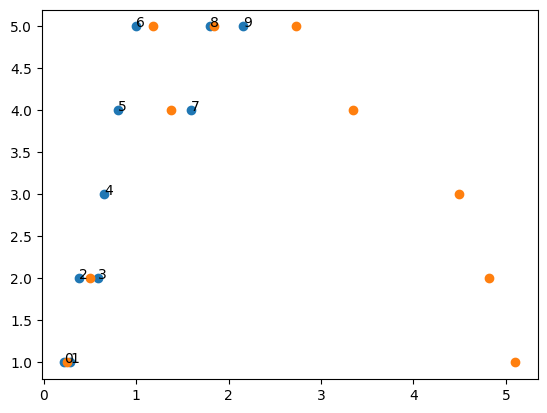

In [5]:
X1 = data.A
X2 = data.D
Y_kolejka = []
Y_wykonane = []



for time in data.A:
    suma_kolejka = 0
    for tin, tout in zip(data.A, data.D):
        if time >= tin and time <= tout:
            suma_kolejka+=1

    Y_kolejka.append(suma_kolejka)
    
for time in data.D:
    suma_wykonane = 0
    for tin, tout in zip(data.A, data.D):
        if time >= tin and time <= tout:
            suma_wykonane+=1
            
    Y_wykonane.append(suma_wykonane)

fig, ax = plt.subplots()
ax.scatter(X1, Y_kolejka)
ax.scatter(X2, Y_wykonane)


for i in range(len(data.A)):
    ax.annotate(i, (X1[i],Y_kolejka[i]))

plt.show()

### Czas oczekiwania

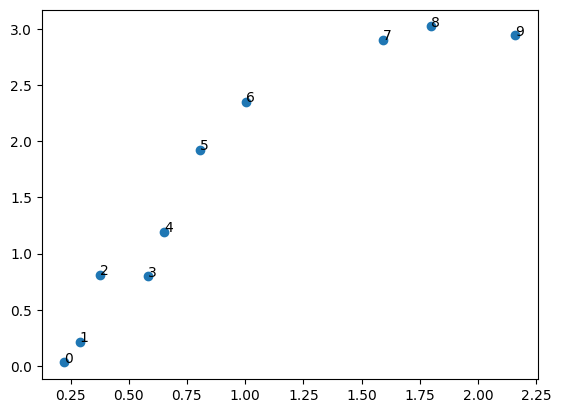

In [6]:
X = data.A
Y = np.array(data.D) - np.array(data.A)

fig, ax = plt.subplots()
ax.scatter(X, Y)

for i in range(len(data.A)):
    ax.annotate(i, (X[i], Y[i]))

plt.show()

### Liczba wykonanych

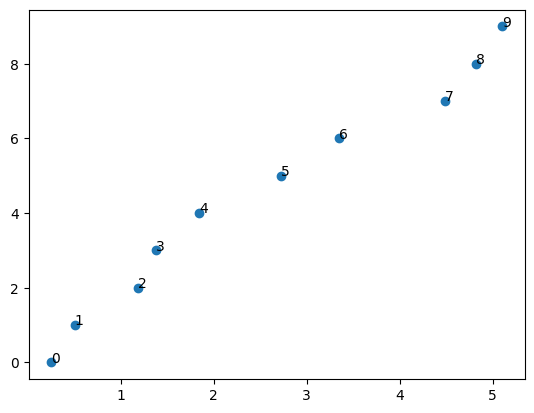

In [7]:
X = data.D
Y = range(len(data.D))


fig, ax = plt.subplots()
ax.scatter(X, Y)

for i in range(len(data.A)):
    ax.annotate(i, (X[i], Y[i]))
plt.show()